In [2]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("sms-spam.csv")
df.head() # check the first 5 rows


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.tail() # check the last 5 rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.sample(5) # check 5 random rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5085,ham,Sorry i missed your call. Can you please call ...,NaN,NaN,NaN
675,ham,"I dont knw pa, i just drink milk..",NaN,NaN,NaN
5312,ham,Here got ur favorite oyster... N got my favori...,NaN,NaN,NaN
2652,ham,No need for the drug anymore.,NaN,NaN,NaN
1882,ham,"Sorry, I can't help you on this.",NaN,NaN,NaN


In [10]:
df.columns # check the columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True) # drop the columns

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.rename(columns={'v1':'result', 'v2':'input'}, inplace= True)

In [15]:
df.head()

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['result'].value_counts()

result
ham     4825
spam     747
Name: count, dtype: int64

In [18]:
# df.isnull()
df.isnull().sum()

result    0
input     0
dtype: int64

In [22]:
df.duplicated().sum() # calculate the number of duplicates


np.int64(403)

In [23]:
df =df.drop_duplicates() #delete duplicates

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.head()

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
# df['result'] = df['result'].map({'ham': 0, 'spam': 1})
encoder = LabelEncoder()
df['result'] = encoder.fit_transform(df['result'])


In [62]:
df.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### EDA (Exploratory Data Analysis)

In [63]:
df.result.value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [28]:
df.shape # check the shape of the dataframe rows, columns

(5169, 2)

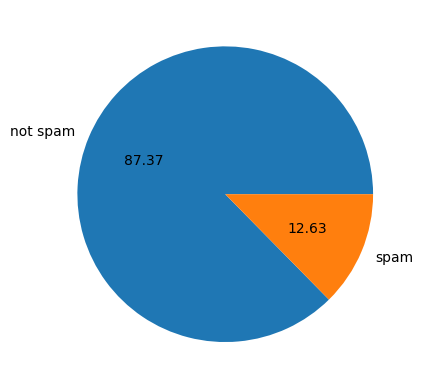

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(), labels = ['not spam', 'spam'], autopct= '%.2f')
plt.show()

In [32]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [34]:
import nltk

In [35]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/agrit/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/agrit/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/agrit/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/agrit/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/agrit/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]   

True

In [36]:
df = df.replace({"ham": 0, "spam": 1})

In [37]:
df.head(10)

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [38]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/agrit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/agrit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score 

In [65]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/agrit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
#creating a new column with count of characters
df['countCharacters'] = df['input'].apply(len)

#creating a new column with count of words
df['countWords'] = df['input'].apply(lambda x: len(nltk.word_tokenize(x)))

#creating a new column with count of sentences
df['countSentences'] = df['input'].apply(lambda x: len(nltk.sent_tokenize(x)))

# 'sent_tokenize' is used to split the text into sentences and return a list of sentences


In [69]:
df.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [71]:
df[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
df[df['result']== 0][['countCharacters','countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [74]:
df[df['result']== 1][['countCharacters','countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

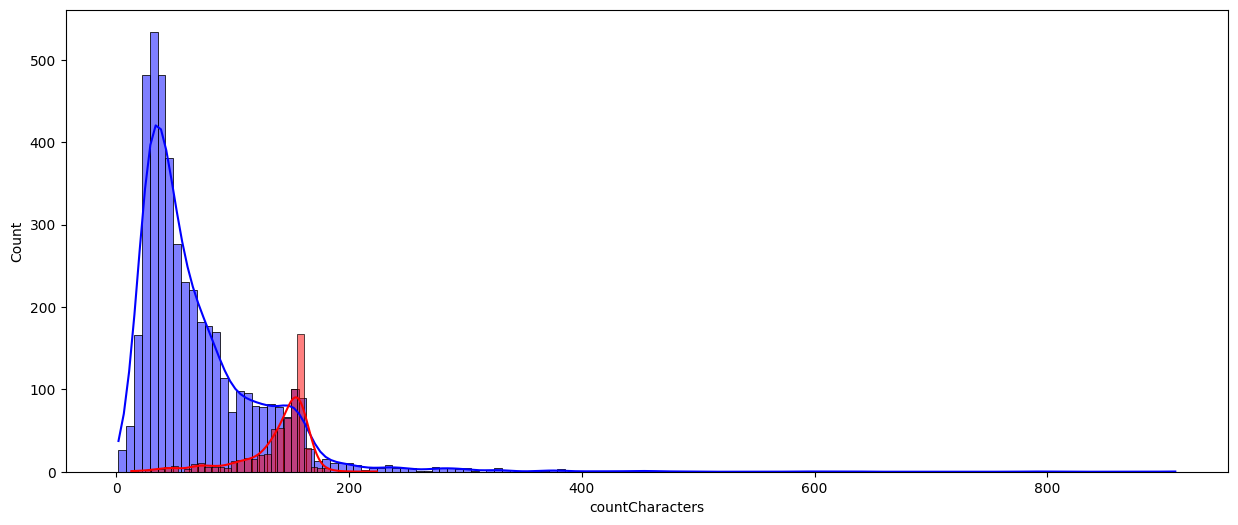

In [80]:
plt.figure(figsize=(15, 6))
sns.histplot(df[df['result']== 0]['countCharacters'], color='blue', kde=True)
sns.histplot(df[df['result']== 1]['countCharacters'], color='red', kde=True)

<Axes: xlabel='countWords', ylabel='Count'>

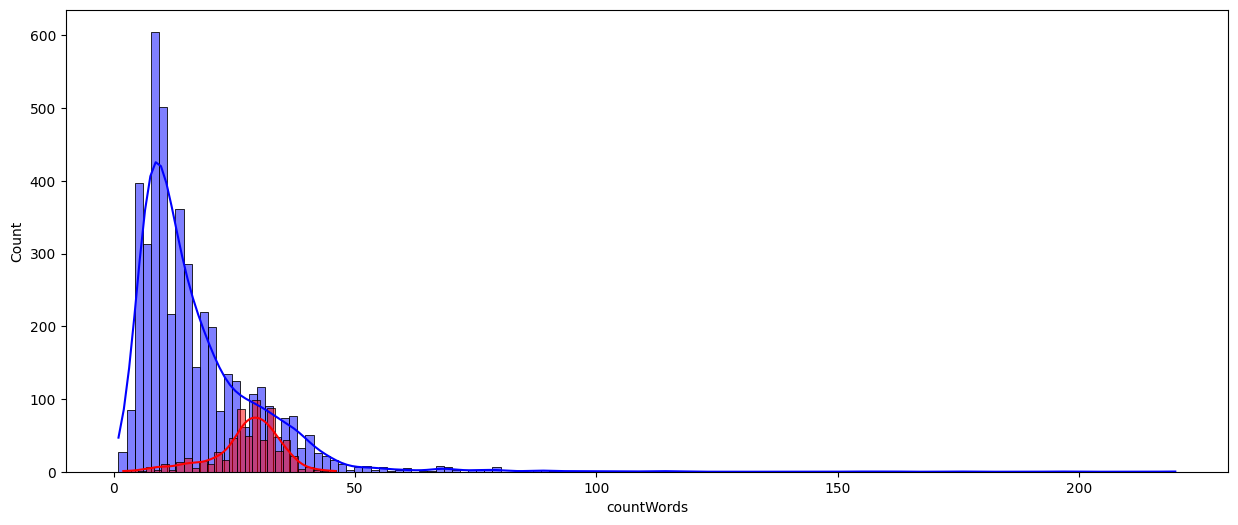

In [81]:
plt.figure(figsize=(15, 6))
sns.histplot(df[df['result']== 0]['countWords'], color='blue', kde=True)
sns.histplot(df[df['result']== 1]['countWords'], color='red', kde=True)

<Axes: xlabel='countSentences', ylabel='Count'>

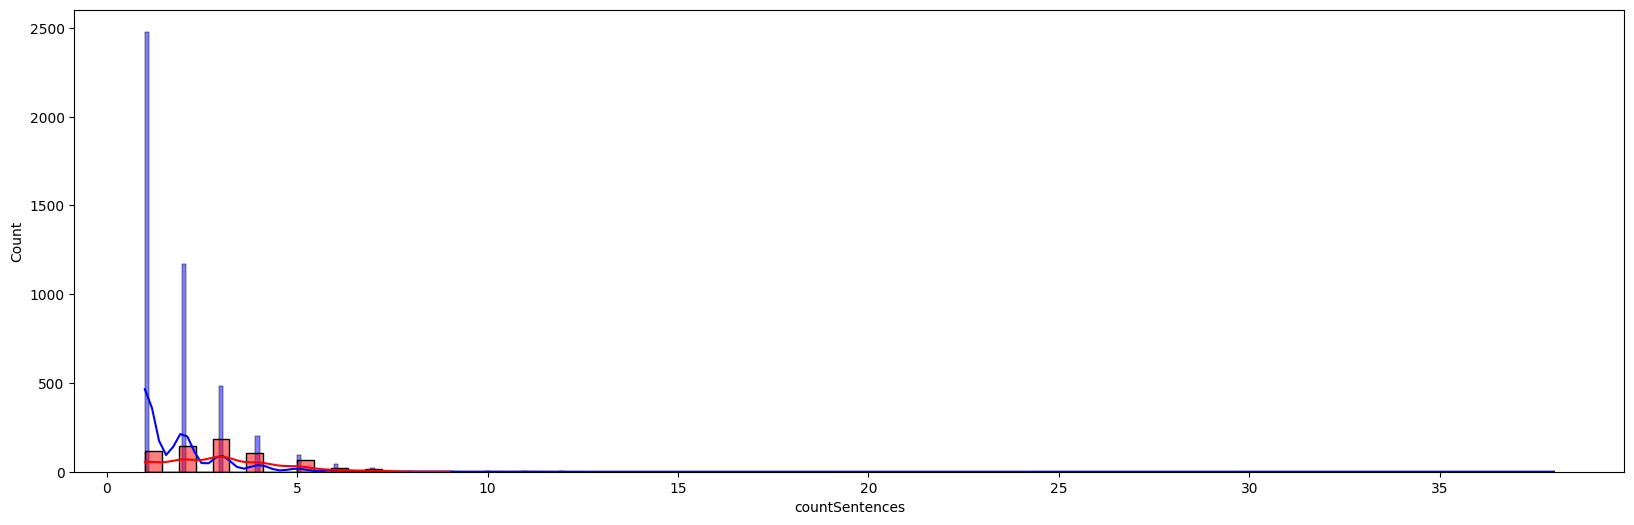

In [86]:
plt.figure(figsize=(20, 6))
sns.histplot(df[df['result']== 0]['countSentences'], color='blue', kde=True)
sns.histplot(df[df['result']== 1]['countSentences'], color='red', kde=True)

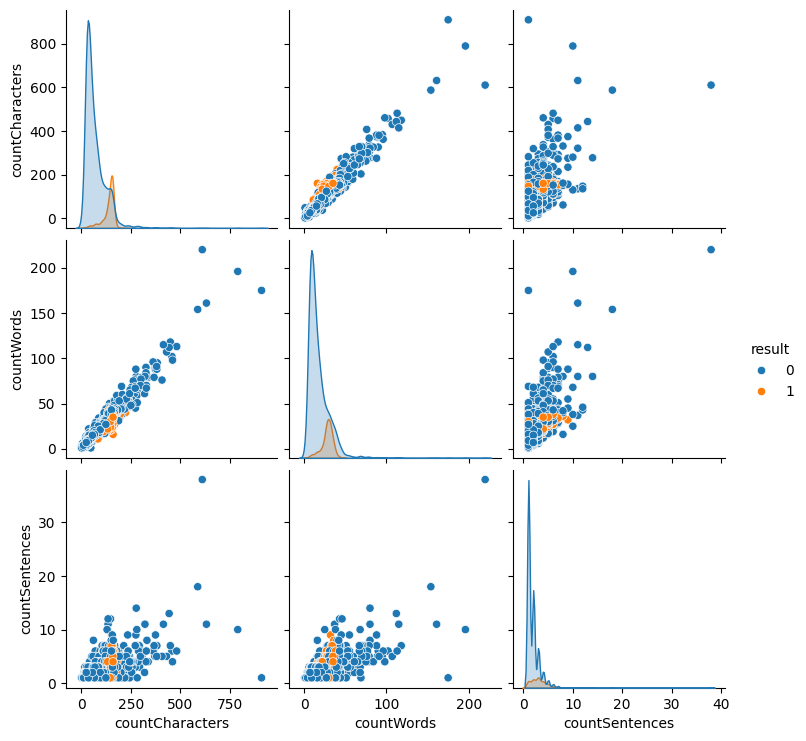

In [87]:
sns.pairplot(df, hue='result')

## Data PreProcessing

In [110]:
def transform_text (text):
    
    #converting to lower case
    text = text.lower()
    
    #tokenization
    text = nltk.word_tokenize(text)
    
    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)
            
    #updating the text after removed special characters
    text = removedSC[:]
    
    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)
            
    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]
    
    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]
    return " ".join(text)

In [106]:
transform_text("I am Shyam Tripathi")

'shyam tripathi'

In [107]:
from nltk.corpus import stopwords

In [111]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [109]:
# will create a new column with the processed text
df['processed_text'] = df['input'].apply(transform_text)

df.head()

TypeError: argument of type 'WordListCorpusReader' is not iterable